## Import Relevant Libraries

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True, rc={'figure.figsize':(11.7,8.27)})

## Missions Data Analysis

In [2]:
#Ingest data
missions = pd.read_csv('missions.csv')

#Display the top 5 rows, consider data types, shape and missingness for data wrangling
print(missions.head(5))
print(missions.dtypes)
print(missions.shape)
print(missions.isna().sum())

   Unnamed: 0  ID Company Name  \
0           0   0       SpaceX   
1           1   1         CASC   
2           2   2       SpaceX   
3           3   3    Roscosmos   
4           4   4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | 

In [3]:
#Cleaning initial column names, and extracting year from date, and country from location for easier comparison.
missions=missions.drop(columns=['Unnamed: 0'])
missions=missions.rename(columns = {' Cost': "Cost"})
missions['Year'] = pd.to_numeric(missions['Date'].str[12:16])
missions['Cost']=pd.to_numeric(missions['Cost'].str.replace(',', ''))
missions['Country'] = missions['Location'].str.rsplit(",",n=1).str[1]

#Assigning binary interpretation to Status Mission
missions['Status Mission Numeric'] = missions['Status Mission'].replace({'Prelaunch Failure':0,'Partial Failure':0.5, 'Failure':0,'Success':1})
missions.head(5)

,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission,Year,Country,Status Mission Numeric
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA,1.0
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China,1.0
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,USA,1.0
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Kazakhstan,1.0
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,USA,1.0


[Text(0, 0.5, 'Proportion of Available Cost Data')]

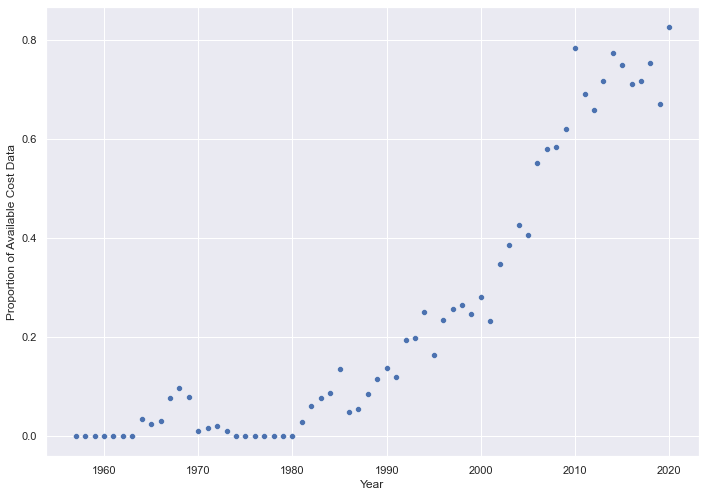

In [4]:
#Plotting Cost data missingness by year
missing=missions.groupby('Year')['Cost'].count().rsub(missions.groupby('Year')['Cost'].size(), axis=0)
total=missions.groupby('Year')['Country'].count()
costvalues=[1-int(b) / int(m) for b,m in zip(missing, total)]
Years=missions.groupby('Year',as_index=False)['Country'].count()['Year']
sns.scatterplot(x=Years, y=costvalues).set(ylabel='Proportion of Available Cost Data')

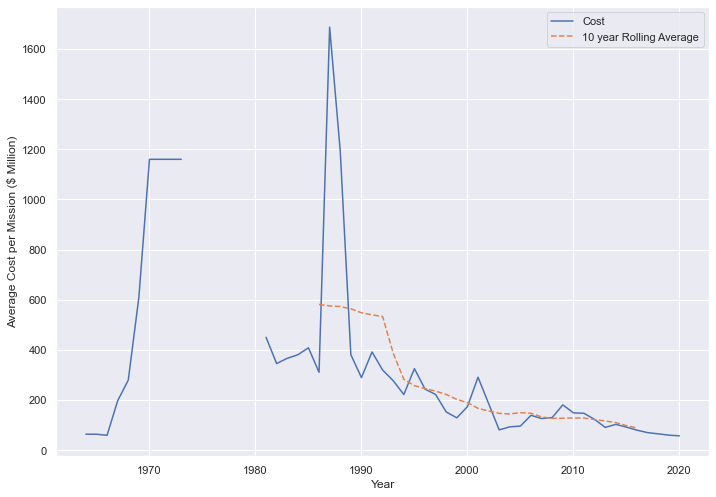

In [5]:
#Plotting Average Cost per Mission by Year; Year by Year and 10 Year Rolling Average
missions.groupby(['Year'],dropna = True)['Cost'].mean().plot().set(ylabel='Average Cost per Mission ($ Million)') #Plotting average cost by year
missions.groupby(['Year'],dropna = True).mean()['Cost'].rolling(10, center=True).mean().plot(ls='dashed').legend(labels=['Cost','10 year Rolling Average']) #trendline

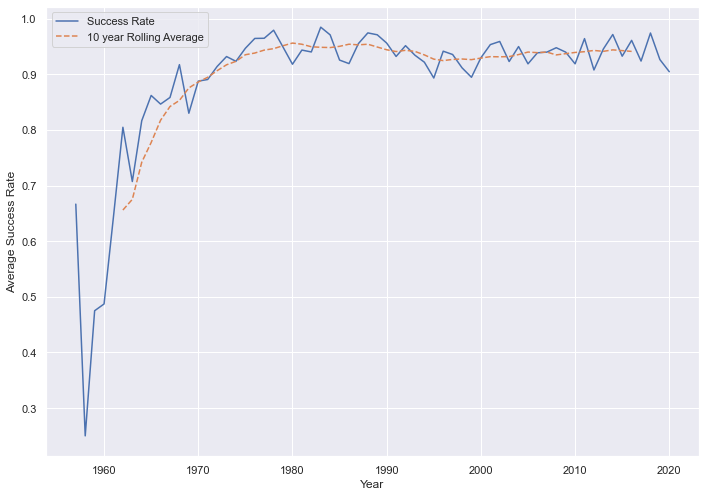

In [6]:
#Plotting Average Success Rate by Year; Year by Year and 10 Year Rolling Average
missions.groupby(['Year'])['Status Mission Numeric'].mean().plot().set(ylabel='Average Success Rate')
missions.groupby(['Year']).mean()['Status Mission Numeric'].rolling(10, center=True).mean().plot(ls='dashed').legend(labels=['Success Rate','10 year Rolling Average']) #trendline

In [7]:
#Viewing the rolling means
missions.groupby(['Year']).mean()['Cost'].rolling(10, center=True).mean().dropna()
missions.groupby(['Year']).mean()['Status Mission Numeric'].rolling(10, center=True).mean().dropna()

Year
1962    0.656054
1963    0.675237
1964    0.741984
1965    0.777494
1966    0.817561
1967    0.842214
1968    0.853140
1969    0.875612
1970    0.886292
1971    0.894776
1972    0.906582
1973    0.917225
1974    0.923415
1975    0.935303
1976    0.938337
1977    0.943627
1978    0.946243
1979    0.951524
1980    0.956278
1981    0.954156
1982    0.949631
1983    0.948675
1984    0.948195
1985    0.950412
1986    0.954219
1987    0.953073
1988    0.954205
1989    0.949162
1990    0.944249
1991    0.941025
1992    0.943256
1993    0.941292
1994    0.935011
1995    0.927369
1996    0.924727
1997    0.926855
1998    0.927612
1999    0.926477
2000    0.929290
2001    0.931837
2002    0.931548
2003    0.931977
2004    0.935592
2005    0.940118
2006    0.939028
2007    0.940108
2008    0.934979
2009    0.937236
2010    0.939406
2011    0.940783
2012    0.943017
2013    0.941408
2014    0.944053
2015    0.942713
2016    0.941297
Name: Status Mission Numeric, dtype: float64

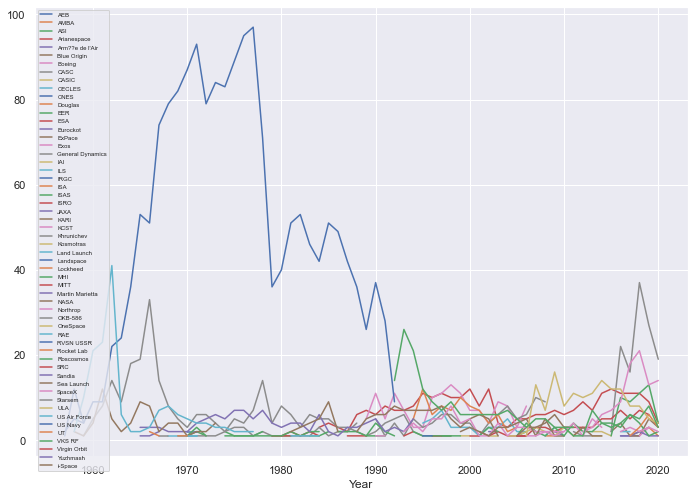

In [8]:
#Plotting mission count by year, split by company
missions.groupby(['Year','Company Name']).count()['ID'].unstack().plot().legend(fontsize=6)

In [9]:
#Finding the name of the max company
missions.groupby(['Year','Company Name']).count()['ID'].nlargest(1)

Year  Company Name
1977  RVSN USSR       97
Name: ID, dtype: int64

In [10]:
#Finding the earliest and largest mission dates to display years active
missions.groupby(['Company Name'],dropna = True)['Year'].agg([('Year Min', 'min'),('Year Max', 'max')])

,Year Min,Year Max
Company Name,,
AEB,1997,2003
AMBA,1958,1967
ASI,1967,1988
Arianespace,1984,2020
Arm??e de l'Air,1965,1967
Blue Origin,2015,2019
Boeing,1989,2006
CASC,1969,2020
CASIC,2002,2017


### Missions with Active Rocket Status


In [11]:
#Creating a dataframe of only missions with Active Rocket statuses.
active_missions=missions.loc[missions['Status Rocket'] == 'StatusActive']
print(active_missions.shape)
print(active_missions.isna().sum())

(790, 11)
ID                          0
Company Name                0
Location                    0
Date                        0
Detail                      0
Status Rocket               0
Cost                      204
Status Mission              0
Year                        0
Country                     0
Status Mission Numeric      0
dtype: int64


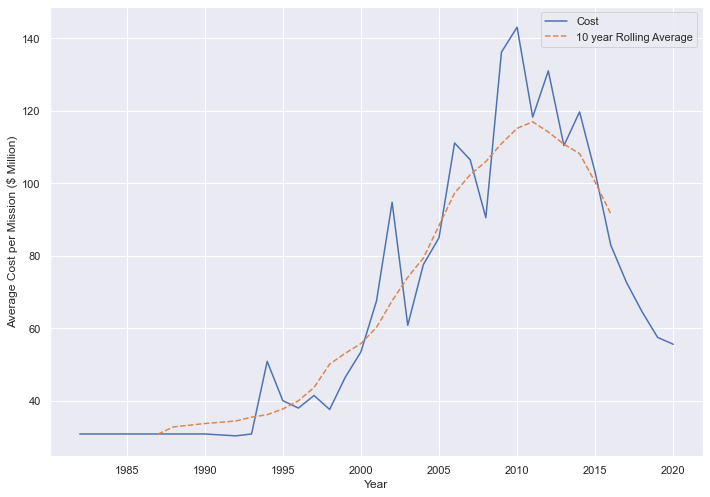

In [12]:
#Plotting cost of active rockets by year
active_missions.groupby(['Year'],dropna = True)['Cost'].mean().plot().set(ylabel='Average Cost per Mission ($ Million)')
active_missions.groupby(['Year']).mean()['Cost'].rolling(10, center=True).mean().plot(ls='dashed').legend(labels=['Cost','10 year Rolling Average']) #trendline

In [13]:
#Finding the peak value
active_missions.groupby(['Year']).mean()['Cost'].rolling(10, center=True).mean().max()

116.9551272069061

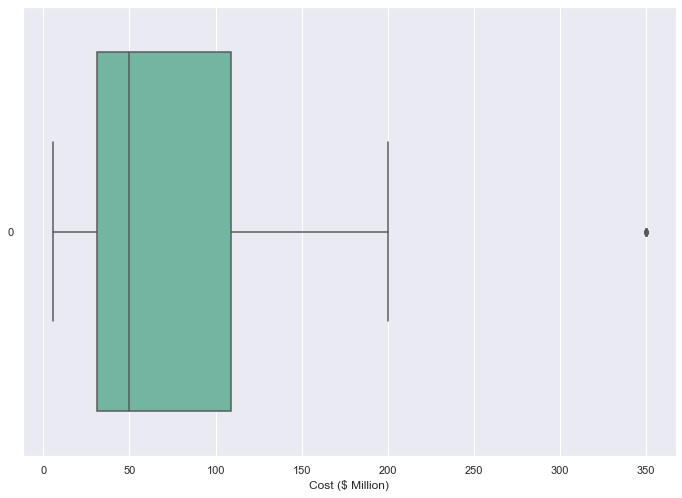

In [14]:
#Investigating Cost for outliers
ax = sns.boxplot(data=active_missions['Cost'], orient="h", palette="Set2").set(xlabel='Cost ($ Million)') #investigate further

In [15]:
#Investigating the outlier
active_missions[active_missions['Cost']>200]

,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission,Year,Country,Status Mission Numeric
167,167,ULA,"SLC-6, Vandenberg AFB, California, USA","Sat Jan 19, 2019 19:10 UTC",Delta IV Heavy | NROL-71,StatusActive,350.0,Success,2019,USA,1.0
222,222,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Sun Aug 12, 2018 07:31 UTC",Delta IV Heavy | Parker Solar Probe,StatusActive,350.0,Success,2018,USA,1.0
433,433,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Sat Jun 11, 2016 17:51 UTC",Delta IV Heavy | NROL-37,StatusActive,350.0,Success,2016,USA,1.0
529,529,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Fri Dec 05, 2014 12:05 UTC",Delta IV Heavy | EFT-1,StatusActive,350.0,Success,2014,USA,1.0
595,595,ULA,"SLC-6, Vandenberg AFB, California, USA","Wed Aug 28, 2013 18:03 UTC",Delta IV Heavy | NROL-65,StatusActive,350.0,Success,2013,USA,1.0
641,641,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Fri Jun 29, 2012 13:15 UTC",Delta IV Heavy | NROL-15,StatusActive,350.0,Success,2012,USA,1.0
700,700,ULA,"SLC-6, Vandenberg AFB, California, USA","Thu Jan 20, 2011 21:10 UTC",Delta IV Heavy | NROL-49,StatusActive,350.0,Success,2011,USA,1.0
706,706,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Sun Nov 21, 2010 22:58 UTC",Delta IV Heavy | NROL-32,StatusActive,350.0,Success,2010,USA,1.0
788,788,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Sun Jan 18, 2009 02:47 UTC",Delta IV Heavy | NROL-26,StatusActive,350.0,Success,2009,USA,1.0
843,843,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Sun Nov 11, 2007 01:50 UTC",Delta IV Heavy | DSP-23,StatusActive,350.0,Success,2007,USA,1.0


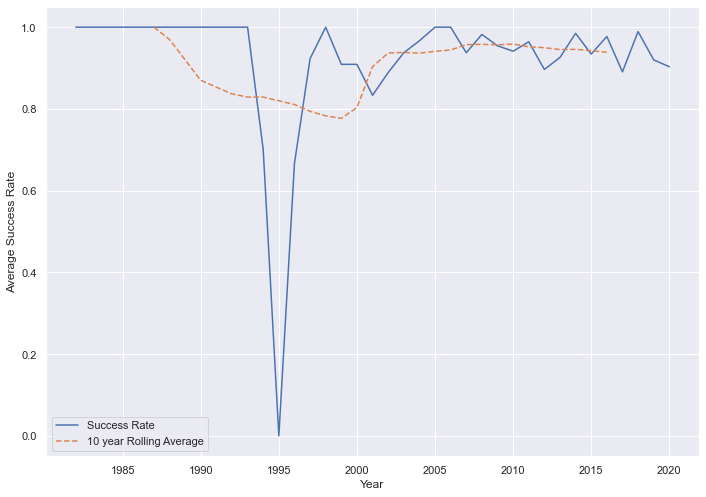

In [16]:
#Investigating changes in success by year of active missions
active_missions.groupby(['Year'],dropna = True)['Status Mission Numeric'].mean().plot().set(ylabel='Average Success Rate') #investigate 1994-6
active_missions.groupby(['Year']).mean()['Status Mission Numeric'].rolling(10, center=True).mean().plot(ls='dashed').legend(labels=['Success Rate','10 year Rolling Average']) #trendline

In [17]:
#Displaying company by success rate and average cost per mission, and years active, dropping missing cost values
average_success=active_missions.groupby(['Company Name'],dropna = True)['Status Mission Numeric'].agg([('Status Mission Count', 'count'),('Status Mission Mean', 'mean')])
average_cost=active_missions.groupby(['Company Name'],dropna = True)['Cost'].agg([('Cost Count', 'count'),('Cost Mean', 'mean')])
years_active=active_missions.groupby(['Company Name'],dropna = True)['Year'].agg([('Year Min', 'min'),('Year Max', 'max')])
country=active_missions.groupby(['Company Name'],dropna = True)['Country'].agg(lambda x:x.value_counts().index[0])
success_cost=pd.concat([average_success, average_cost, years_active, country],axis=1).dropna()
success_cost

,Status Mission Count,Status Mission Mean,Cost Count,Cost Mean,Year Min,Year Max,Country
Company Name,,,,,,,
Arianespace,114,0.973684,93,169.623656,2002,2020,France
Boeing,1,0.500000,1,350.000000,2004,2004,USA
CASC,211,0.964455,158,40.128228,1982,2020,China
ESA,1,1.000000,1,37.000000,2012,2012,France
ExPace,10,0.900000,1,28.300000,2017,2020,China
ILS,13,1.000000,13,101.538462,2002,2019,USA
ISRO,50,0.960000,49,32.551020,2007,2019,India
JAXA,6,0.833333,3,56.000000,2016,2020,Japan
MHI,32,1.000000,28,90.000000,2001,2020,Japan


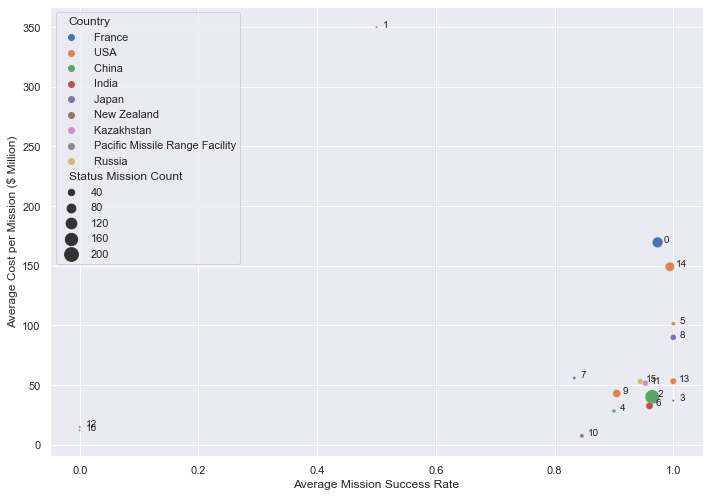

In [38]:
#Plotting the Average Cost per Mission by Average Success Rate; Companies with Active Rockets and Non-Zero Cost Values; Size Denotes Number of Missions; Colour Denotes Country
sns.scatterplot(data=success_cost, x='Status Mission Mean', y='Cost Mean', hue='Country', size='Status Mission Count', sizes=(5,200)).set(ylabel='Average Cost per Mission ($ Million)', xlabel='Average Mission Success Rate')
for i in range(success_cost.shape[0]):
    plt.text(x=success_cost['Status Mission Mean'][i]+0.01,y=success_cost['Cost Mean'][i]+0.01,s=i, 
          fontdict=dict(size=10))

In [39]:
#Describing the astronauts data; Continuous 
active_missions.describe()

,ID,Cost,Year,Status Mission Numeric
count,790.000000,586.000000,790.000000,790.000000
mean,553.432911,81.479625,2012.430380,0.939873
std,414.353036,68.622389,7.315251,0.229050
min,0.000000,5.300000,1982.000000,0.000000
25%,214.250000,31.000000,2008.000000,1.000000
50%,481.500000,50.000000,2015.000000,1.000000
75%,813.250000,109.000000,2018.000000,1.000000
max,2309.000000,350.000000,2020.000000,1.000000


In [40]:
#Describing the astronauts data; Categorical
active_missions.astype('object').describe()

,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission,Year,Country,Status Mission Numeric
count,790,790,790,790,790,790,586.0,790,790,790,790.0
unique,790,31,62,789,786,1,39.0,4,37,18,3.0
top,2041,CASC,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Nov 05, 2008 00:15 UTC",Safir-1B+ | Unknown Payload,StatusActive,200.0,Success,2019,China,1.0
freq,1,211,75,2,3,790,75.0,736,100,223,736.0


In [41]:
#Viewing Rocket Lab Missions
missions[missions['Company Name']=='Rocket Lab']

,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission,Year,Country,Status Mission Numeric
15,15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,2020,New Zealand,0.0
21,21,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jun 13, 2020 05:12 UTC",Electron/Curie | Don't stop me now!,StatusActive,7.5,Success,2020,New Zealand,1.0
55,55,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Fri Jan 31, 2020 02:56 UTC",Electron/Curie | Birds of a Feather / NROL-151,StatusActive,7.5,Success,2020,New Zealand,1.0
77,77,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Fri Dec 06, 2019 08:18 UTC",Electron/Curie | Running Out Of Fingers,StatusActive,7.5,Success,2019,New Zealand,1.0
93,93,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Thu Oct 17, 2019 01:22 UTC",Electron/Curie | As The Crow Flies,StatusActive,7.5,Success,2019,New Zealand,1.0
109,109,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Mon Aug 19, 2019 12:12 UTC","Electron/Curie | Look Ma, No Hands!",StatusActive,7.5,Success,2019,New Zealand,1.0
128,128,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jun 29, 2019 04:30 UTC",Electron/Curie | Make it Rain,StatusActive,7.5,Success,2019,New Zealand,1.0
140,140,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sun May 05, 2019 06:00 UTC",Electron/Curie | That's a Funny Looking Cactus,StatusActive,7.5,Success,2019,New Zealand,1.0
151,151,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Thu Mar 28, 2019 23:27 UTC",Electron/Curie | Two Thumbs Up,StatusActive,7.5,Success,2019,New Zealand,1.0
180,180,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sun Dec 16, 2018 06:33 UTC",Electron/Curie | This one's for Pickering,StatusActive,7.5,Success,2018,New Zealand,1.0


## Astronauts Data

In [42]:
#Ingesting astronauts data
astronauts = pd.read_csv('astronauts.csv')
#Display the top 5 rows, consider data types, shape and missingness for data wrangling
print(astronauts.head(5))
print(astronauts.dtypes)
print(astronauts.shape)
print(astronauts.isna().sum())

   Unnamed: 0  id  number  nationwide_number                 name  \
0           0   1       1                  1        Gagarin, Yuri   
1           1   2       2                  2       Titov, Gherman   
2           2   3       3                  1  Glenn, John H., Jr.   
3           3   4       3                  1  Glenn, John H., Jr.   
4           4   5       4                  2  Carpenter, M. Scott   

             original_name   sex  year_of_birth     nationality  \
0  ГАГАРИН Юрий Алексеевич  male           1934  U.S.S.R/Russia   
1  ТИТОВ Герман Степанович  male           1935  U.S.S.R/Russia   
2      Glenn, John H., Jr.  male           1921            U.S.   
3      Glenn, John H., Jr.  male           1921            U.S.   
4      Carpenter, M. Scott  male           1925            U.S.   

  military_civilian  ... year_of_mission    mission_title   ascend_shuttle  \
0          military  ...            1961         Vostok 1         Vostok 1   
1          military  ...  

In [43]:
#Cleaning initial column names, dropping columns, adding years of experience at mission and age at mission.
astronauts=astronauts.rename(columns = {'field21': "eva"})
astronauts=astronauts.drop(columns=['Unnamed: 0', 'original_name'])
astronauts['training_years']=astronauts['year_of_mission']-astronauts['year_of_selection']
astronauts['age']=astronauts['year_of_mission']-astronauts['year_of_birth']
astronauts.head(5)

,id,number,nationwide_number,name,sex,year_of_birth,nationality,military_civilian,selection,year_of_selection,...,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,eva,eva_hrs_mission,total_eva_hrs,training_years,age
0,1,1,1,"Gagarin, Yuri",male,1934,U.S.S.R/Russia,military,TsPK-1,1960,...,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0,1,27
1,2,2,2,"Titov, Gherman",male,1935,U.S.S.R/Russia,military,TsPK-1,1960,...,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0,1,26
2,3,3,1,"Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,1959,...,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0,3,41
3,4,3,1,"Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,1959,...,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0,39,77
4,5,4,2,"Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,1959,...,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0,3,37


In [44]:
#Describing the astronauts data; Continuous 
astronauts.describe()

,id,number,nationwide_number,year_of_birth,year_of_selection,mission_number,total_number_of_missions,year_of_mission,hours_mission,total_hrs_sum,eva,eva_hrs_mission,total_eva_hrs,training_years,age
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,639.000000,274.233359,128.754111,1951.683634,1985.58888,1.992169,2.982772,1994.597494,1050.883984,2968.341410,0.628818,3.661287,10.761410,9.008614,42.913861
std,368.782456,148.185389,97.263590,11.435117,12.21917,1.145361,1.400745,12.583237,1714.791959,4214.715104,1.165753,7.287245,16.045247,5.133401,5.819552
min,1.000000,1.000000,1.000000,1921.000000,1959.00000,1.000000,1.000000,1961.000000,0.000000,0.610000,0.000000,0.000000,0.000000,-9.000000,26.000000
25%,320.000000,153.000000,47.000000,1944.000000,1978.00000,1.000000,2.000000,1986.000000,190.030000,482.000000,0.000000,0.000000,0.000000,5.000000,39.000000
50%,639.000000,278.000000,110.000000,1952.000000,1987.00000,2.000000,3.000000,1995.000000,261.000000,932.000000,0.000000,0.000000,0.000000,8.000000,42.000000
75%,958.000000,390.000000,204.000000,1959.000000,1995.00000,3.000000,4.000000,2003.000000,382.000000,4264.000000,1.000000,4.720000,19.520000,12.000000,47.000000
max,1277.000000,565.000000,433.000000,1983.000000,2018.00000,7.000000,7.000000,2019.000000,10505.000000,21083.520000,7.000000,89.130000,78.800000,39.000000,77.000000


In [45]:
#Describing the astronauts data; Categorical
astronauts.astype('object').describe()

,id,number,nationwide_number,name,sex,year_of_birth,nationality,military_civilian,selection,year_of_selection,...,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,eva,eva_hrs_mission,total_eva_hrs,training_years,age
count,1277,1277,1277,1277,1277,1277,1277,1277,1272,1277,...,1276,1277,1276,1277.0,1277.0,1277,1277.0,1277.0,1277,1277
unique,1277,564,346,564,2,60,40,2,228,47,...,436,289,432,471.0,494.0,8,262.0,216.0,32,37
top,1277,192,1,"Chang-Diaz, Franklin R.",male,1956,U.S.,military,NASA- 16,1978,...,STS-42,ISS,STS-42,283.0,565.0,0,0.0,0.0,6,39
freq,1,7,49,7,1134,78,854,769,51,138,...,8,174,8,27.0,11.0,901,901.0,674.0,122,102


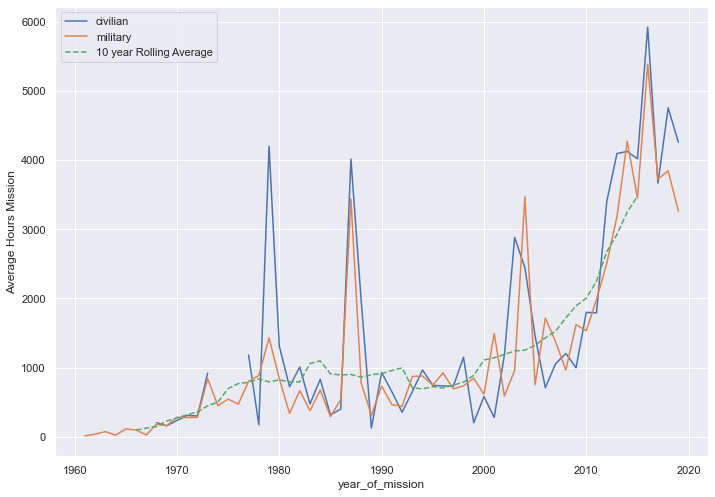

In [46]:
#Plotting Average Hours Mission by Year; Year by Year Split by Civilian/Military; 10 Year Rolling Average
astronauts.groupby(['year_of_mission','military_civilian']).mean()['hours_mission'].unstack().plot().set(ylabel='Average Hours Mission') #military and civilian
astronauts.groupby(['year_of_mission']).mean()['hours_mission'].rolling(10, center=True).mean().plot(ls='dashed').legend(labels=['civilian','military','10 year Rolling Average']) #trendline

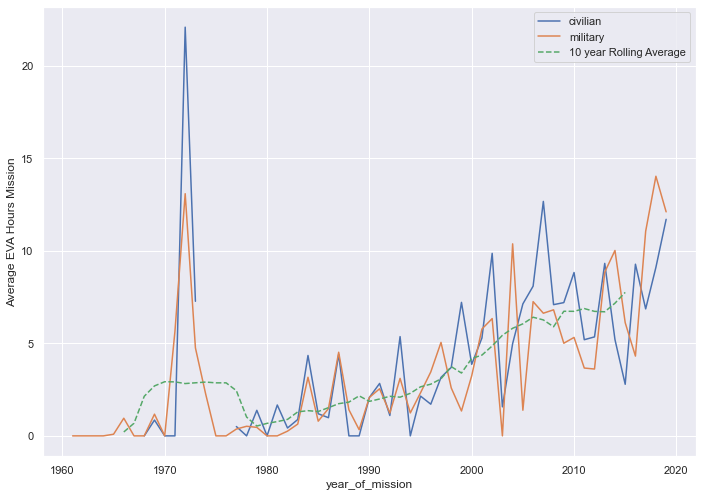

In [47]:
#Plotting Average EVA Hours Mission by Year; Year by Year Split by Civilian/Military; 10 Year Rolling Average
astronauts.groupby(['year_of_mission','military_civilian']).mean()['eva_hrs_mission'].unstack().plot().set(ylabel='Average EVA Hours Mission')
astronauts.groupby(['year_of_mission']).mean()['eva_hrs_mission'].rolling(10, center=True).mean().plot(ls='dashed').legend(labels=['civilian','military','10 year Rolling Average']) #trendline

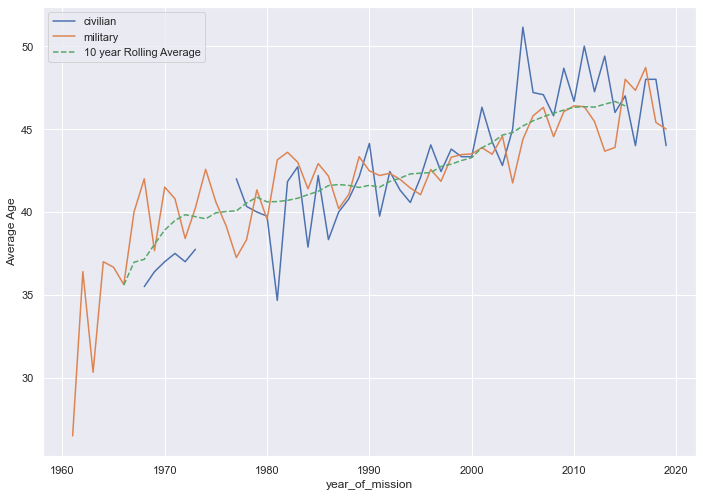

In [48]:
#Plotting Average Age During Mission by Year; Year by Year Split by Civilian/Military; 10 Year Rolling Average
astronauts.groupby(['year_of_mission','military_civilian']).mean()['age'].unstack().plot().set(ylabel='Average Age')
astronauts.groupby(['year_of_mission']).mean()['age'].rolling(10, center=True).mean().plot(ls='dashed').legend(labels=['civilian','military','10 year Rolling Average']) #trendline

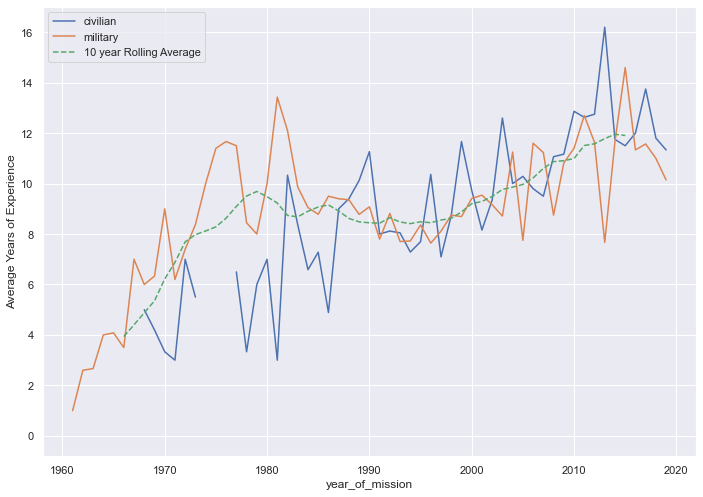

In [49]:
#Plotting Average Years of Experience During Mission by Year; Year by Year Split by Civilian/Military; 10 Year Rolling Average
astronauts.groupby(['year_of_mission','military_civilian']).mean()['training_years'].unstack().plot().set(ylabel='Average Years of Experience')
astronauts.groupby(['year_of_mission']).mean()['training_years'].rolling(10, center=True).mean().plot(ls='dashed').legend(labels=['civilian','military','10 year Rolling Average']) #trendline

In [50]:
#Viewing the rolling means
astronauts.groupby(['year_of_mission']).mean()['hours_mission'].rolling(10, center=True).mean()
astronauts.groupby(['year_of_mission']).mean()['eva_hrs_mission'].rolling(10, center=True).mean()
astronauts.groupby(['year_of_mission']).mean()['age'].rolling(10, center=True).mean()
astronauts.groupby(['year_of_mission']).mean()['training_years'].rolling(10, center=True).mean()

year_of_mission
1961          NaN
1962          NaN
1963          NaN
1964          NaN
1965          NaN
1966     3.936718
1967     4.403385
1968     4.876718
1969     5.351718
1970     6.218385
1971     6.876718
1972     7.693385
1973     7.976718
1974     8.121957
1975     8.285000
1976     8.632692
1977     9.096026
1978     9.506442
1979     9.687853
1980     9.479744
1981     9.230820
1982     8.737486
1983     8.682724
1984     8.902900
1985     9.072131
1986     9.154438
1987     8.912243
1988     8.620217
1989     8.482855
1990     8.444963
1991     8.431388
1992     8.649544
1993     8.476145
1994     8.413661
1995     8.485340
1996     8.449394
1997     8.554612
1998     8.626698
1999     8.874317
2000     9.203650
2001     9.292817
2002     9.489327
2003     9.767488
2004     9.857232
2005     9.966323
2006    10.225602
2007    10.600436
2008    10.869960
2009    10.908055
2010    10.993952
2011    11.508952
2012    11.578095
2013    11.781126
2014    11.957023
2015    11.9

In [51]:
#Investigating Astronauts by Selection Group, with 10 largest total mission hours
total_hrs=astronauts.groupby(['selection'])['total_hrs_sum'].mean().nlargest(10)
selection_year=astronauts.groupby(['selection'])['year_of_selection'].agg([('Selection Year Min', 'min'),('Selection Year Max', 'max')])
mission_year=astronauts.groupby(['selection'])['year_of_mission'].agg([('Mission Year Min', 'min'),('Mission Year Max', 'max')])
pd.concat([total_hrs, selection_year, mission_year],axis=1).dropna()

,total_hrs_sum,Selection Year Min,Selection Year Max,Mission Year Min,Mission Year Max
NPOE-7,19281.650000,1985,1985,1988,2005
TsPK-10,19128.061667,1989,1989,1996,2015
NPOE-6,18462.620000,1984,1984,1992,2010
NPOE-8,17942.230000,1987,1987,1993,1998
IMBP-1,16288.530000,1972,1972,1988,1994
RKKE-14,13670.576000,1997,1998,2002,2019
1989 NPOE Cosmonaut Group,13270.420000,1989,1989,1994,2001
MKS,12806.073750,1996,1996,2004,2018
NPOE-11,12770.850000,1994,1994,2001,2013
1996 NASA group 8,12752.000000,1996,1996,2000,2016


In [52]:
#select astronauts with 10 largest total mission hours
largest10=astronauts.groupby(['selection'],as_index=False)['total_hrs_sum'].mean().nlargest(10, columns='total_hrs_sum')
astronauts[astronauts['selection'].isin(largest10['selection'])]

,id,number,nationwide_number,name,sex,year_of_birth,nationality,military_civilian,selection,year_of_selection,...,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,eva,eva_hrs_mission,total_eva_hrs,training_years,age
447,448,210,66,"Polyakov, Valeri",male,1942,U.S.S.R/Russia,civilian,IMBP-1,1972,...,Soyuz TM­6,Mir,Soyuz TM­7,5782.00,16288.53,0,0.00,0.00,16,46
448,449,210,66,"Polyakov, Valeri",male,1942,U.S.S.R/Russia,civilian,IMBP-1,1972,...,Soyuz TM­18,Mir,Soyuz TM­20,10505.00,16288.53,0,0.00,0.00,22,52
450,451,212,67,"Krikalev, Sergei",male,1958,U.S.S.R/Russia,civilian,NPOE-7,1985,...,Soyuz TM­7,Mir,Soyuz TM­7,3635.00,19281.65,0,0.00,41.43,3,30
451,452,212,67,"Krikalev, Sergei",male,1958,U.S.S.R/Russia,civilian,NPOE-7,1985,...,Soyuz TM­12,Mir,Soyuz TM­13,7484.00,19281.65,7,34.48,41.43,6,33
452,453,212,67,"Krikalev, Sergei",male,1958,U.S.S.R/Russia,civilian,NPOE-7,1985,...,STS­60,STS­60,STS­60,199.00,19281.65,0,0.00,41.43,9,36
453,454,212,67,"Krikalev, Sergei",male,1958,U.S.S.R/Russia,civilian,NPOE-7,1985,...,STS­88,STS­88,STS­88,283.00,19281.65,0,0.00,41.43,13,40
454,455,212,67,"Krikalev, Sergei",male,1958,U.S.S.R/Russia,civilian,NPOE-7,1985,...,Soyuz TM­31,ISS,STS­102,3383.00,19281.65,0,0.00,41.43,15,42
455,456,212,67,"Krikalev, Sergei",male,1958,U.S.S.R/Russia,civilian,NPOE-7,1985,...,Soyuz TMA­6,ISS,Soyuz TMA­6,4296.00,19281.65,1,4.95,41.43,20,47
608,609,268,73,"Kaleri, Aleksandr",male,1956,U.S.S.R/Russia,civilian,NPOE-6,1984,...,Soyuz TM­14,Mir,Soyuz TM­14,3494.00,18462.62,1,2.05,23.58,8,36
609,610,268,73,"Kaleri, Aleksandr",male,1956,U.S.S.R/Russia,civilian,NPOE-6,1984,...,Soyuz TM­24,Mir,Soyuz TM­24,4721.00,18462.62,2,12.60,23.58,12,40
